In [2]:
from scipy.signal import convolve2d
import numpy as np

N = 8

def diamond(n):
    if n% 2:
        result = [[0]*i+[1]*(n-(2*i))+[0]*i for i in range(n//2, -1,-1)]
        return result + result[:-1][::-1]

    result = [[0]*i+[1]*(n-(2*i))+[0]*i for i in range(n//2-1, -1, -1)]
    
    return np.asarray(result + result[::-1])
# Create a NxN array of ones
array = np.ones((N, N))

# Create a 5x5 kernel of ones except the corners and the center
kernel = np.array(diamond(5))
kernel[2, 2] = 0

# Perform the convolution
result = convolve2d(array, kernel, mode='same')

print(result)

[[ 5.  7.  8.  8.  8.  8.  7.  5.]
 [ 7. 10. 11. 11. 11. 11. 10.  7.]
 [ 8. 11. 12. 12. 12. 12. 11.  8.]
 [ 8. 11. 12. 12. 12. 12. 11.  8.]
 [ 8. 11. 12. 12. 12. 12. 11.  8.]
 [ 8. 11. 12. 12. 12. 12. 11.  8.]
 [ 7. 10. 11. 11. 11. 11. 10.  7.]
 [ 5.  7.  8.  8.  8.  8.  7.  5.]]


In [3]:
edges = {}
for n1 in range(N):
    for n2 in range(N):
        for x in [-2,-1,0,1,2]:
            for y in [-2,-1,0,1,2]:
                if n1+x >= 0 and n1+x < N and n2+y >= 0 and n2+y < N:
                    if kernel[x+2,y+2] == 1:
                        if (n1,n2) not in edges:
                            edges[(n1,n2)] = []
                        edges[(n1,n2)].append((n1+x,n2+y))


In [4]:
edges_flatten = {key[0]*N+key[1]: [neighbor[0]*N+neighbor[1] for neighbor in neighbors] for key,neighbors in edges.items()}

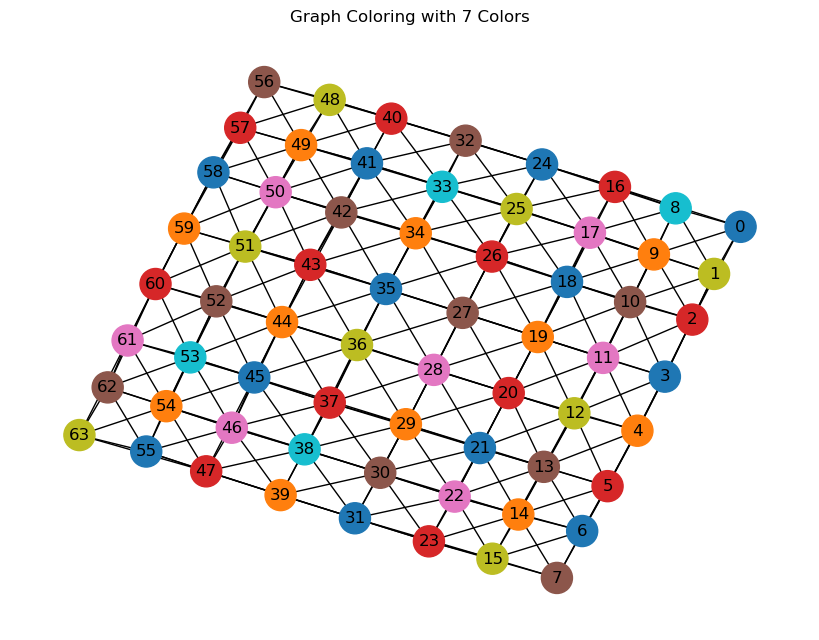

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a graph
G = nx.Graph()
for node, neighs in edges_flatten.items():
    for neigh in neighs:
        G.add_edge(node, neigh)

# Step 2: Compute graph coloring (minimum number of colors)
colors = nx.coloring.greedy_color(G, strategy="largest_first")  # Greedy coloring algorithm

# Step 3: Assign colors to nodes
node_colors = [colors[node] for node in G.nodes]

# Step 4: Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=500,
    cmap=plt.cm.tab10
)
plt.title(f"Graph Coloring with {max(node_colors) + 1} Colors")
plt.show()

In [6]:
len(node_colors)

64

In [7]:
np.unique(node_colors, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([12, 11, 12, 10,  7,  8,  4]))

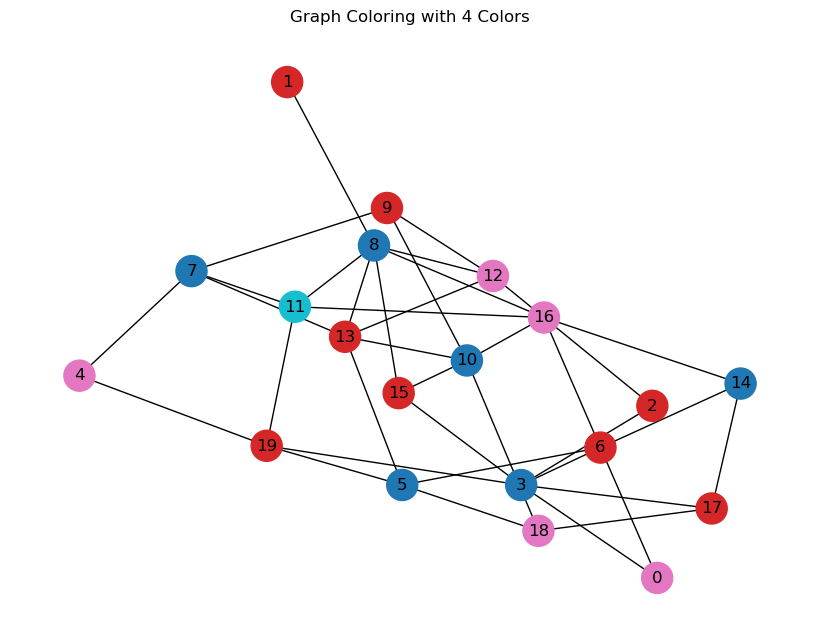

In [11]:
N1 = 20
n_list = {}
for n1 in range(N1):
    n_list[n1] = np.arange(N1)[np.random.rand(N1) > 0.9]

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a graph
G = nx.Graph()
for node, neighs in n_list.items():
    for neigh in neighs:
        G.add_edge(node, neigh)

# Step 2: Compute graph coloring (minimum number of colors)
colors = nx.coloring.greedy_color(G, strategy="largest_first")  # Greedy coloring algorithm

# Step 3: Assign colors to nodes
node_colors = [colors[node] for node in G.nodes]

# Step 4: Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=500,
    cmap=plt.cm.tab10
)
plt.title(f"Graph Coloring with {max(node_colors) + 1} Colors")
plt.show()
